# Intro to Tensorflow 

scalar(rank: 0)  --> vector (rank: 1)--> matrices(rank: 2) --> tensor 

- Two popular machine learning libraries :
    - sklearn; can be good for kmeans clustering , random forest  
    - tensorflow; google released in end of 2015; leading library for neural networks, cnn and rnn
        - uses both cpu and gpu; this is crucial for the speed of algorithms and TF utilizes more computing power and this is done automatically 
        - google also introduced TPU (Tebsor Processing unit)
        
Tensor flow is a **deep learning library**     

##  Tensorflow 1 vs Tensorflow 2
- TF1 strange methods and logic of code is unlike other libraries and hard to learn and use. 
- This led to development of high level pacakges such as PyTorch and Keras
- in 2015 Keras was integrated in core TF
- Keras and TF are open source 
- Keras is conceived as an interface for TF rather than a different libraries.
- TF2 came in 2019
    - it borrowed keras syntax
    - no duplicate or deprecated functions
    - eager execution (?)


## TF file formats
- TF does not work well with excel and csv files
- Its tensor based , so **we want format that can store the information in tensors** 
- .npz files 
    - numpy's file type. It allows to stores n-dimensional arrays
    - tensors can be represented as n-dimensional arrays. in npz files data is already organized in required format 
    - in deep learning: data --> preprocess --. save as .npz

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

## Data Generation
    
    

In [2]:
n = 100000 #

x = np.random.uniform(low=-10,high=10, size=(n, 1))
z = np.random.uniform(-10,10, (n, 1))

inputs = np.column_stack((x,z))


noise = np.random.uniform(-1,1, (n,1))

y  = 2*x - 3*z + 5 + noise
inputs.shape

print(inputs.shape , y.shape)

# saving in TF format 
np.savez('tf_intro', inputs= inputs, targets = y)


(100000, 2) (100000, 1)


## Solving with TF 
- With TF we must build our model 
- tf.keras --> module
- tf.keras.Sequential  --> function that indicates that we are laying down the model 
- tf.keras.layers.Dense --> takes the input provided to the model and calculates the dot product of the inputs and the weights and adds the bias. Also applies activation function 
- SGD --> Stochastic Gradient Descent; generalization of gradient descent algorithm 
- Epoch --> iteration over the full dataset 
- verbose = 0 stands for silent or no output about the training is displayed
- try verbose = 1 and verbose = 2 
- kernel_initializer --> broader term for weight 

In [3]:
training_data = np.load('tf_intro.npz')

In [4]:
input_size = 2
output_size = 1

model  = tf.keras.Sequential([
                                tf.keras.layers.Dense(output_size, 
                                kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)) 
                                
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')


model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)


Epoch 1/100
3125/3125 - 1s - loss: 0.6149
Epoch 2/100
3125/3125 - 1s - loss: 0.3805
Epoch 3/100
3125/3125 - 1s - loss: 0.3820
Epoch 4/100
3125/3125 - 1s - loss: 0.3810
Epoch 5/100
3125/3125 - 1s - loss: 0.3816
Epoch 6/100
3125/3125 - 1s - loss: 0.3829
Epoch 7/100
3125/3125 - 1s - loss: 0.3804
Epoch 8/100
3125/3125 - 1s - loss: 0.3790
Epoch 9/100
3125/3125 - 1s - loss: 0.3818
Epoch 10/100
3125/3125 - 1s - loss: 0.3787
Epoch 11/100
3125/3125 - 1s - loss: 0.3804
Epoch 12/100
3125/3125 - 1s - loss: 0.3792
Epoch 13/100
3125/3125 - 1s - loss: 0.3799
Epoch 14/100
3125/3125 - 1s - loss: 0.3817
Epoch 15/100
3125/3125 - 1s - loss: 0.3809
Epoch 16/100
3125/3125 - 1s - loss: 0.3798
Epoch 17/100
3125/3125 - 1s - loss: 0.3785
Epoch 18/100
3125/3125 - 1s - loss: 0.3785
Epoch 19/100
3125/3125 - 1s - loss: 0.3809
Epoch 20/100
3125/3125 - 1s - loss: 0.3811
Epoch 21/100
3125/3125 - 1s - loss: 0.3770
Epoch 22/100
3125/3125 - 1s - loss: 0.3800
Epoch 23/100
3125/3125 - 1s - loss: 0.3797
Epoch 24/100
3125/31

### Extract weights and biases


In [5]:
model.layers[0].get_weights()

[array([[ 1.9896656],
        [-3.0432231]], dtype=float32),
 array([4.9887834], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9896656],
       [-3.0432231]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9887834], dtype=float32)

## Extract the outputs (make predictions) 

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -8.9],
       [ 13.3],
       [-12.3],
       ...,
       [ 14.7],
       [ 22.7],
       [ 12.4]], dtype=float32)

In [9]:
training_data['targets'].round(1)

array([[ -7.9],
       [ 13.4],
       [-12.3],
       ...,
       [ 15.7],
       [ 23.1],
       [ 11.5]])

### Plotting the data

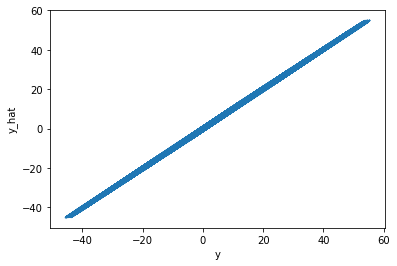

In [10]:
plt.plot(training_data['targets'], model.predict_on_batch(training_data['inputs']))
plt.xlabel('y')
plt.ylabel('y_hat')
plt.show()

In [11]:
np.squeeze?